In [3]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
# %matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
ex_gen = ImageDataGenerator()
print("Tensorflow version : ",tf.__version__)

/Users/surajyadav/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Tensorflow version :  2.16.1


In [4]:
images = glob("../train/**/**")

In [5]:
print(images)

['../train/happy/Training_50449107.jpg', '../train/happy/Training_70433018.jpg', '../train/happy/Training_85610005.jpg', '../train/happy/Training_4460748.jpg', '../train/happy/Training_6312930.jpg', '../train/happy/Training_25740534.jpg', '../train/happy/Training_80076077.jpg', '../train/happy/Training_431681.jpg', '../train/happy/Training_76432922.jpg', '../train/happy/Training_53152280.jpg', '../train/happy/Training_82526594.jpg', '../train/happy/Training_77219425.jpg', '../train/happy/Training_39023213.jpg', '../train/happy/Training_77132618.jpg', '../train/happy/Training_48076410.jpg', '../train/happy/Training_50296064.jpg', '../train/happy/Training_72681057.jpg', '../train/happy/Training_54604212.jpg', '../train/happy/Training_76820039.jpg', '../train/happy/Training_85112475.jpg', '../train/happy/Training_2762255.jpg', '../train/happy/Training_27690434.jpg', '../train/happy/Training_71489691.jpg', '../train/happy/Training_9526722.jpg', '../train/happy/Training_58218094.jpg', '../t

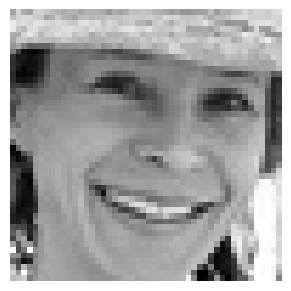

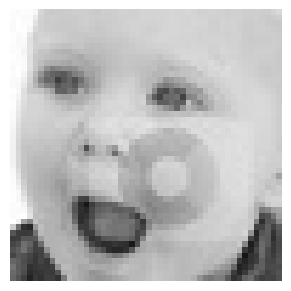

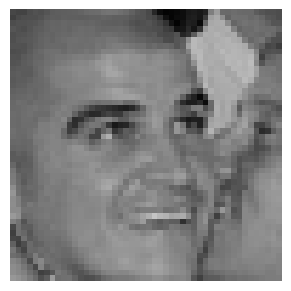

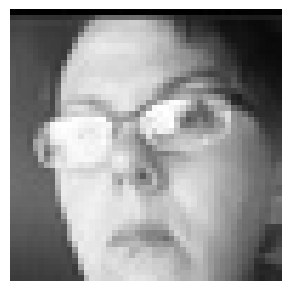

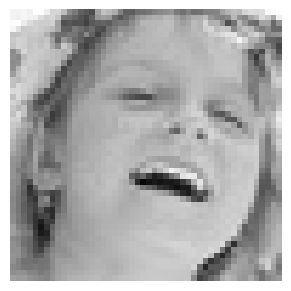

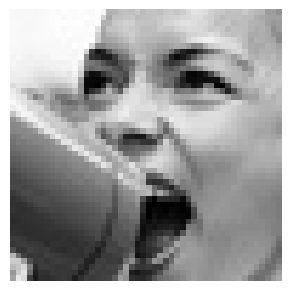

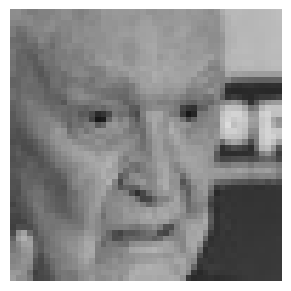

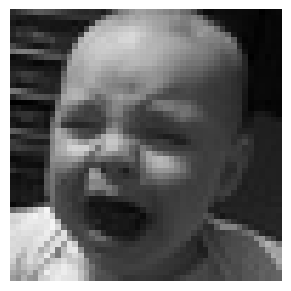

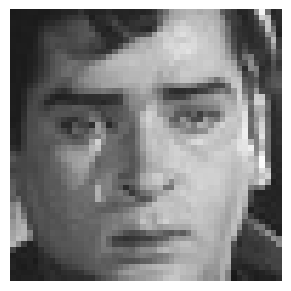

In [6]:
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [7]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = ex_gen.flow_from_directory("../train/", target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = ex_gen.flow_from_directory("../test/", target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [8]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)

    return x

In [9]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.25)(x)

    return x

In [10]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))

    flatten = Flatten()(conv_3)

    dense_1 = Dense_f(flatten,256)

    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])

    model.compile(loss = ["categorical_crossentropy"], optimizer = "adam", metrics = ["accuracy"])

    return model

In [11]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,879,239 (72.02 MB)

 Trainable params: 18,878,471 (72.02 MB)

 Non-trainable params: 768 (3.00 KB)

In [12]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = "max", verbose = 1)
callbacks = [checkpoint]

In [13]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks
)

Epoch 1/15


/Users/surajyadav/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.3269 - loss: 1.8083
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 84s 185ms/step - accuracy: 0.3270 - loss: 1.8079 - val_accuracy: 0.3684 - val_loss: 1.5979
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:20 180ms/step - accuracy: 0.4219 - loss: 1.6152
Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 228us/step - accuracy: 0.4219 - loss: 1.6152 - val_accuracy: 0.2000 - val_loss: 2.1539
Epoch 3/15


2024-05-25 16:17:50.093540: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)
2024-05-25 16:17:50.106025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.4982 - loss: 1.3286
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 83s 184ms/step - accuracy: 0.4982 - loss: 1.3286 - val_accuracy: 0.4411 - val_loss: 1.4958
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:20 180ms/step - accuracy: 0.5156 - loss: 1.3075
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.5156 - loss: 1.3075 - val_accuracy: 0.6000 - val_loss: 1.2878
Epoch 5/15


2024-05-25 16:19:12.897819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:19:12.906016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5685 - loss: 1.1505
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 93s 208ms/step - accuracy: 0.5685 - loss: 1.1506 - val_accuracy: 0.4337 - val_loss: 1.4565
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:37 218ms/step - accuracy: 0.5000 - loss: 1.2564
Epoch 6: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.5000 - loss: 1.2564 - val_accuracy: 0.3000 - val_loss: 1.7707
Epoch 7/15


2024-05-25 16:20:46.600456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:20:46.613642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.6322 - loss: 1.0127
Epoch 7: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 107s 238ms/step - accuracy: 0.6321 - loss: 1.0128 - val_accuracy: 0.4512 - val_loss: 1.4304
Epoch 8/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:34 210ms/step - accuracy: 0.5781 - loss: 1.0787
Epoch 8: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.5781 - loss: 1.0787 - val_accuracy: 0.4000 - val_loss: 1.7713
Epoch 9/15


2024-05-25 16:22:33.904034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:22:33.915763: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6809 - loss: 0.8911
Epoch 9: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 103s 229ms/step - accuracy: 0.6809 - loss: 0.8912 - val_accuracy: 0.4696 - val_loss: 1.5201
Epoch 10/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:31 205ms/step - accuracy: 0.5625 - loss: 1.1369
Epoch 10: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.5625 - loss: 1.1369 - val_accuracy: 0.3000 - val_loss: 1.5557
Epoch 11/15


2024-05-25 16:24:17.187277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:24:17.198306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.7332 - loss: 0.7624
Epoch 11: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 106s 236ms/step - accuracy: 0.7331 - loss: 0.7624 - val_accuracy: 0.4436 - val_loss: 1.5472
Epoch 12/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:29 200ms/step - accuracy: 0.5938 - loss: 1.1515
Epoch 12: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 249us/step - accuracy: 0.5938 - loss: 1.1515 - val_accuracy: 0.6000 - val_loss: 1.3460
Epoch 13/15


2024-05-25 16:26:03.604511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:26:03.615766: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.7719 - loss: 0.6533
Epoch 13: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 110s 246ms/step - accuracy: 0.7718 - loss: 0.6534 - val_accuracy: 0.4150 - val_loss: 1.7805
Epoch 14/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 1:35 214ms/step - accuracy: 0.6719 - loss: 0.8523
Epoch 14: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.6719 - loss: 0.8523 - val_accuracy: 0.6000 - val_loss: 1.3342
Epoch 15/15


2024-05-25 16:27:54.314903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-05-25 16:27:54.328115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.8125 - loss: 0.5551
Epoch 15: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 115s 257ms/step - accuracy: 0.8124 - loss: 0.5552 - val_accuracy: 0.4495 - val_loss: 1.6920


In [14]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.4496 - loss: 1.6909


[1.6927555799484253, 0.44956812262535095]

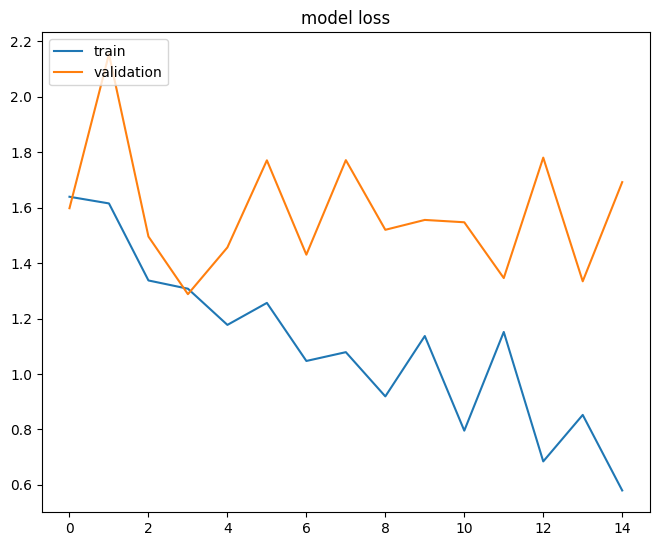

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.legend(["train", "validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

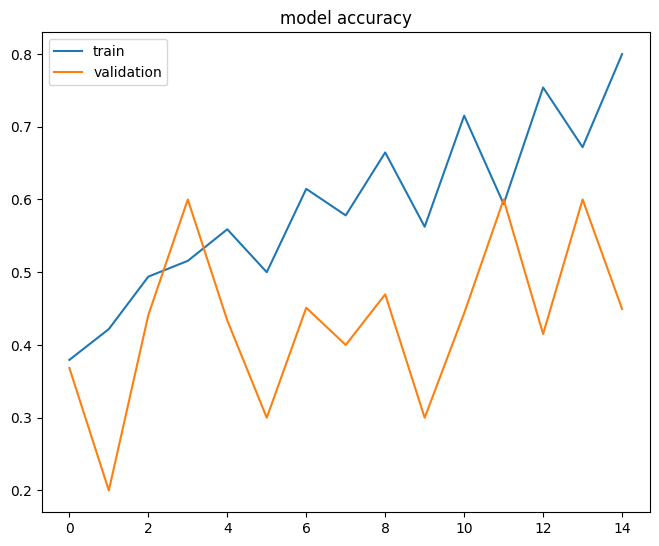

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.legend(["train", "validation"],loc = "upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [17]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)